In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading whale returns
whale_returns = Path('../Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv(
    whale_returns, parse_dates=True, index_col="Date", infer_datetime_format=True
)
whale_returns = whale_returns.sort_index()

# Count nulls

whale_returns.isnull().sum()

# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns = whale_returns.drop_duplicates().copy()

In [3]:
# Reading algorithmic returns
algo_returns = Path('../Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(
    algo_returns, parse_dates=True, index_col="Date", infer_datetime_format=True
)
algo_returns = algo_returns.sort_index()

# Count nulls
algo_returns.isnull().sum()

# Drop nulls
algo_returns = algo_returns.dropna().copy()

In [4]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_returns = Path('../Starter_Code/Resources/sp_tsx_history.csv')
sp_tsx_returns = pd.read_csv(
    sp_tsx_returns, parse_dates=True, index_col="Date", infer_datetime_format=True 
)
sp_tsx_returns = sp_tsx_returns.sort_index()

sp_tsx_returns

# Check Data Types
sp_tsx_returns.dtypes

# Fix Data Types
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace("$", "")
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace(',', '')
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].astype(float)
sp_tsx_returns.dtypes

# Calculate Daily Returns
sp_tsx_returns = sp_tsx_returns.pct_change()
sp_tsx_returns = sp_tsx_returns.dropna().copy()
sp_tsx_returns.head()

# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns=sp_tsx_returns.rename(columns={"Close": "SP TSX 60"})

C:\Users\bpetr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [5]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(
    [whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner"
)
#combined_returns = combined_returns.drop('Close', axis = 'columns')

#combined_returns.rename(columns = {'Daily_Return':'S&P TSX 60'}, inplace = True)

combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


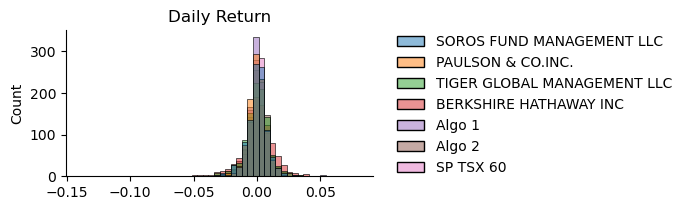

<AxesSubplot:title={'center':'Daily_Returns'}, xlabel='Date'>

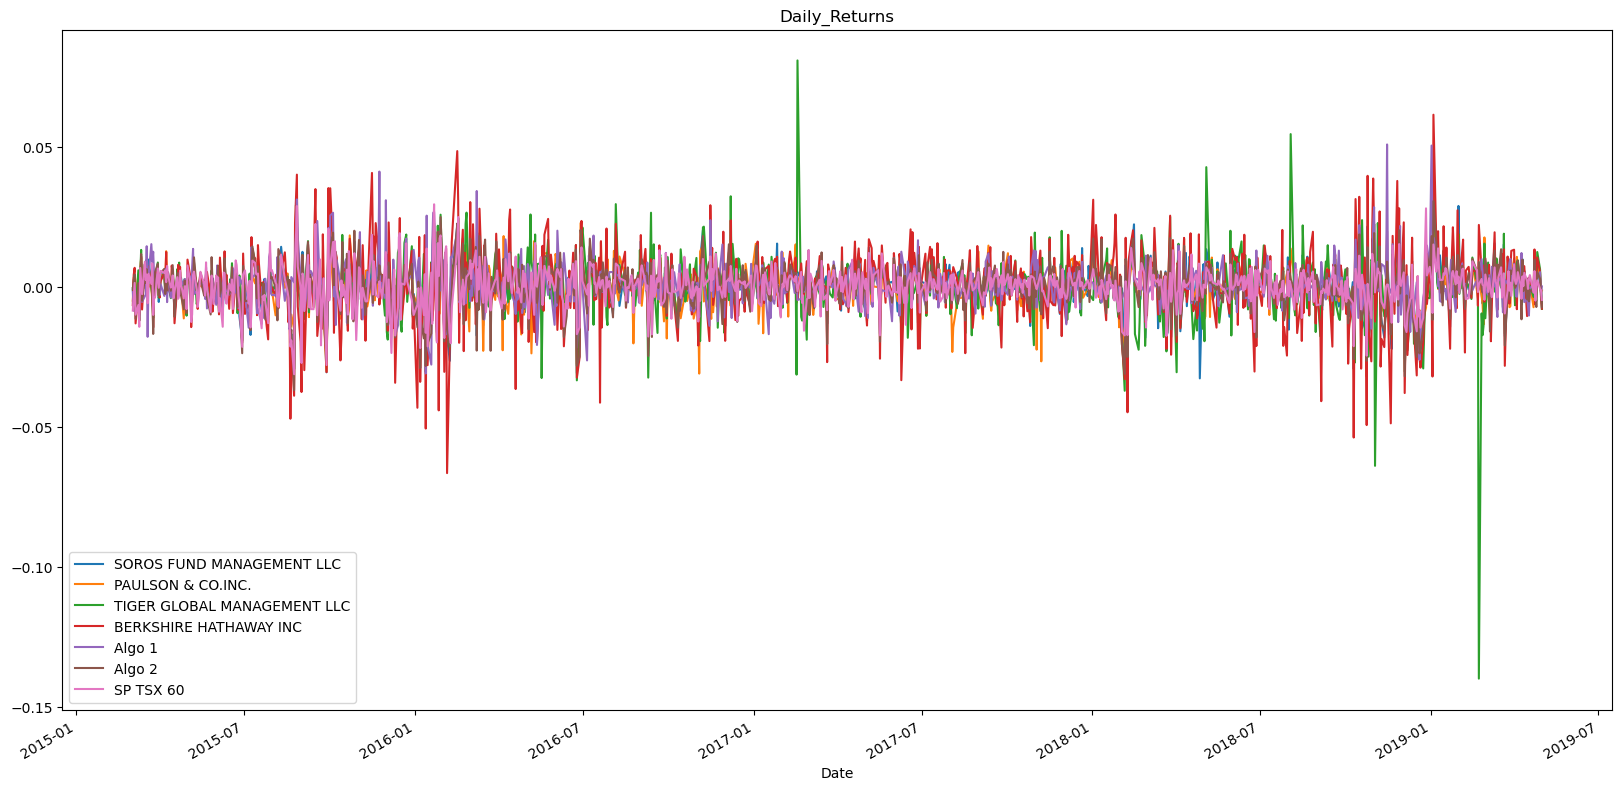

In [6]:
# Plot daily returns of all portfolios
sns.displot(combined_returns, bins = 50, height =2, aspect=2 )
plt.title("Daily Return")
plt.show()

combined_returns.plot(figsize=(20, 10), title='Daily_Returns')

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

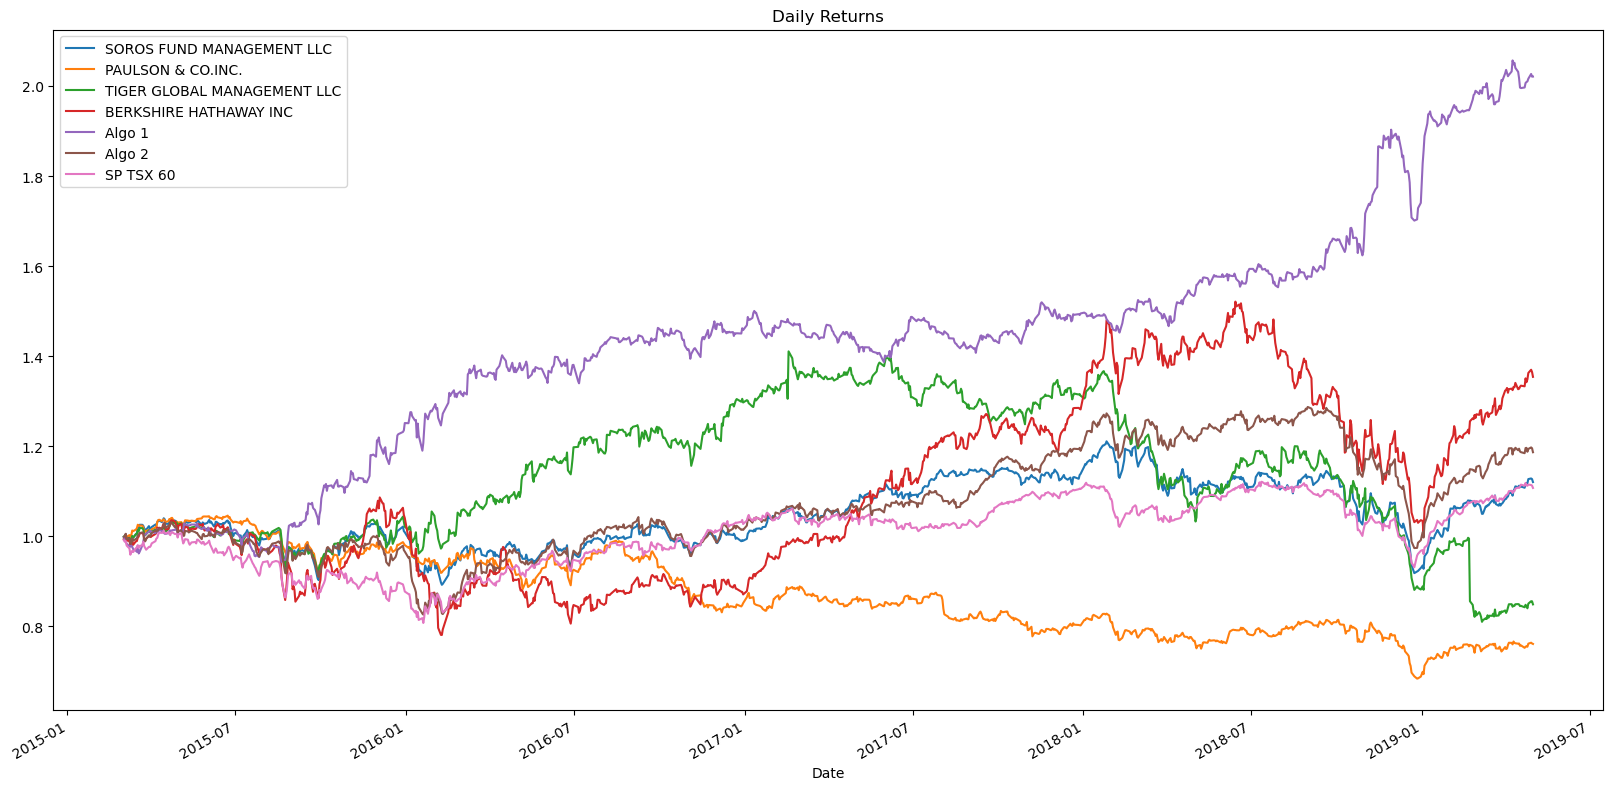

In [7]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

cumulative_returns = combined_returns.sum(axis=1)
cumulative_returns = (combined_returns +1).cumprod()
cumulative_returns.plot(figsize=(20, 10), title='Daily Returns')

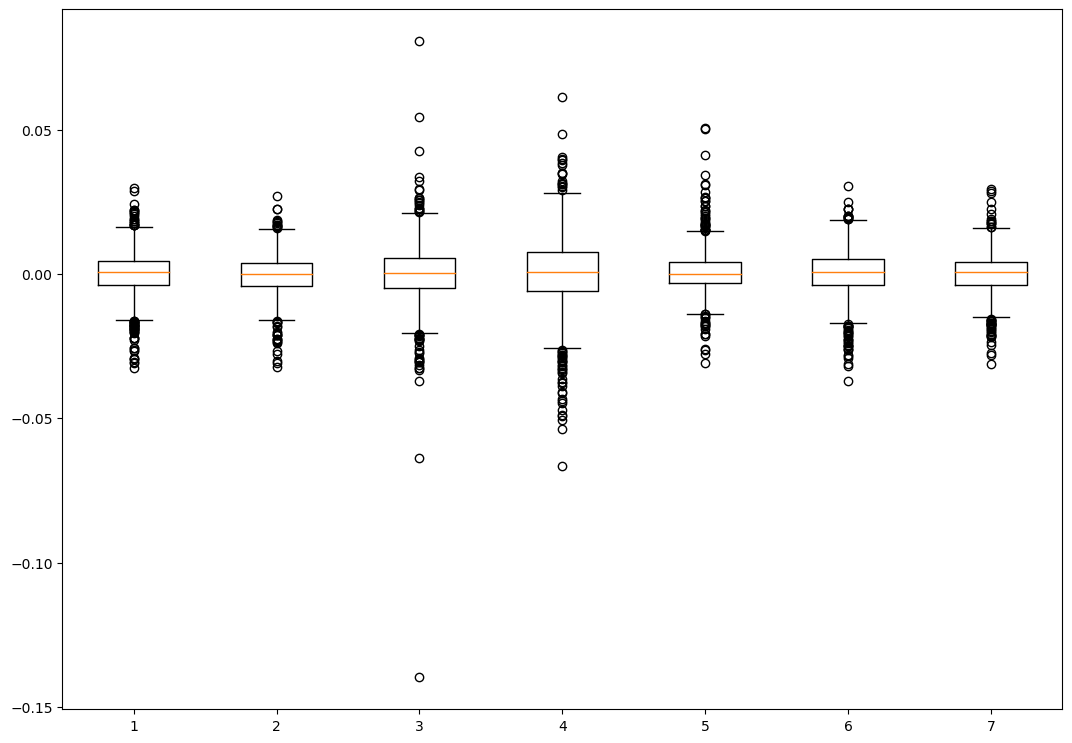

In [8]:
# Box plot to visually show risk
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
box_plot_ = ax.boxplot(combined_returns)
 
# show plot
plt.show()

In [9]:
# Calculate the daily standard deviations of all portfolios
#daily_std = combined_returns.std()
#print(daily_std.head())

combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007936
PAULSON & CO.INC.              0.007079
TIGER GLOBAL MANAGEMENT LLC    0.011034
BERKSHIRE HATHAWAY INC         0.013004
Algo 1                         0.007640
Algo 2                         0.008299
SP TSX 60                      0.007023
dtype: float64

In [10]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = combined_returns["SP TSX 60"].std()

#sp_tsx_std = sp_tsx_std.sort_values(ascending=False)
#daily_std.head()

# Determine which portfolios are riskier than the S&P TSX 60
combined_returns.std() > sp_tsx_std


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP TSX 60                      False
dtype: bool

In [11]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns *np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054


<AxesSubplot:xlabel='Date'>

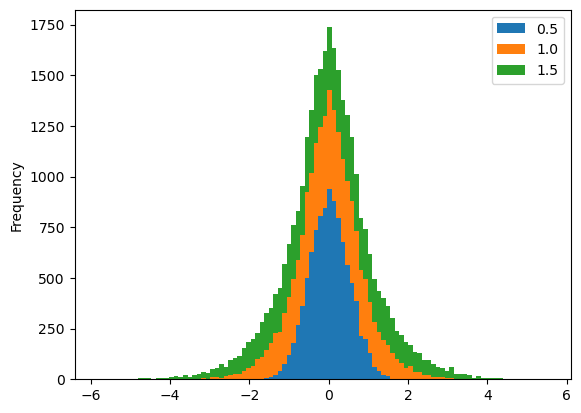

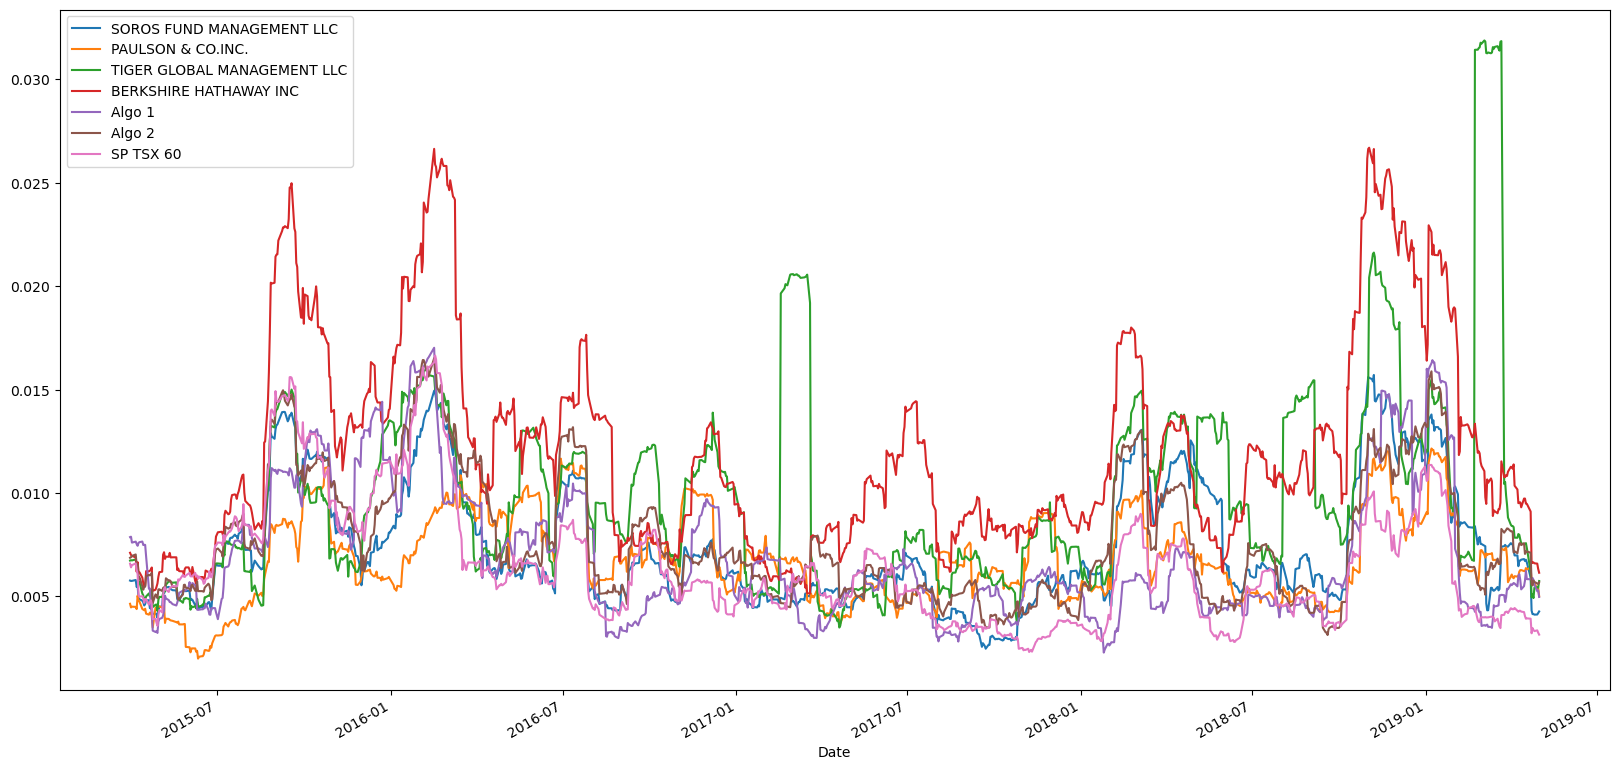

In [12]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
bb_daily_returns = annualized_std.pct_change()
bb_daily_returns.head()

portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

# Plot the rolling standard deviation

MA_21 = combined_returns.rolling(window=21).std()
MA_21.plot(figsize=(20,10))

<AxesSubplot:>

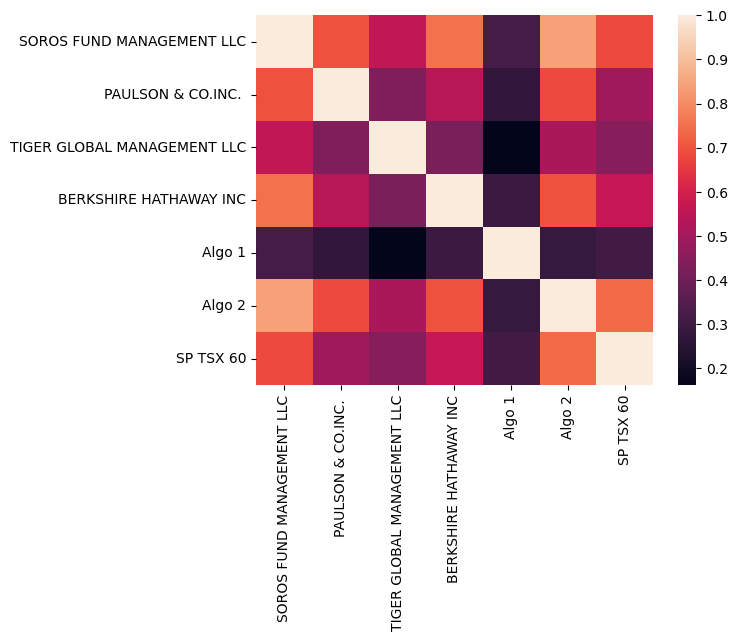

In [13]:
# Calculate the correlation
correlation = combined_returns.corr()
#correlation
# Display de correlation matrix
sns.heatmap(correlation)

<AxesSubplot:title={'center':'Algo 1 Beta'}, xlabel='Date'>

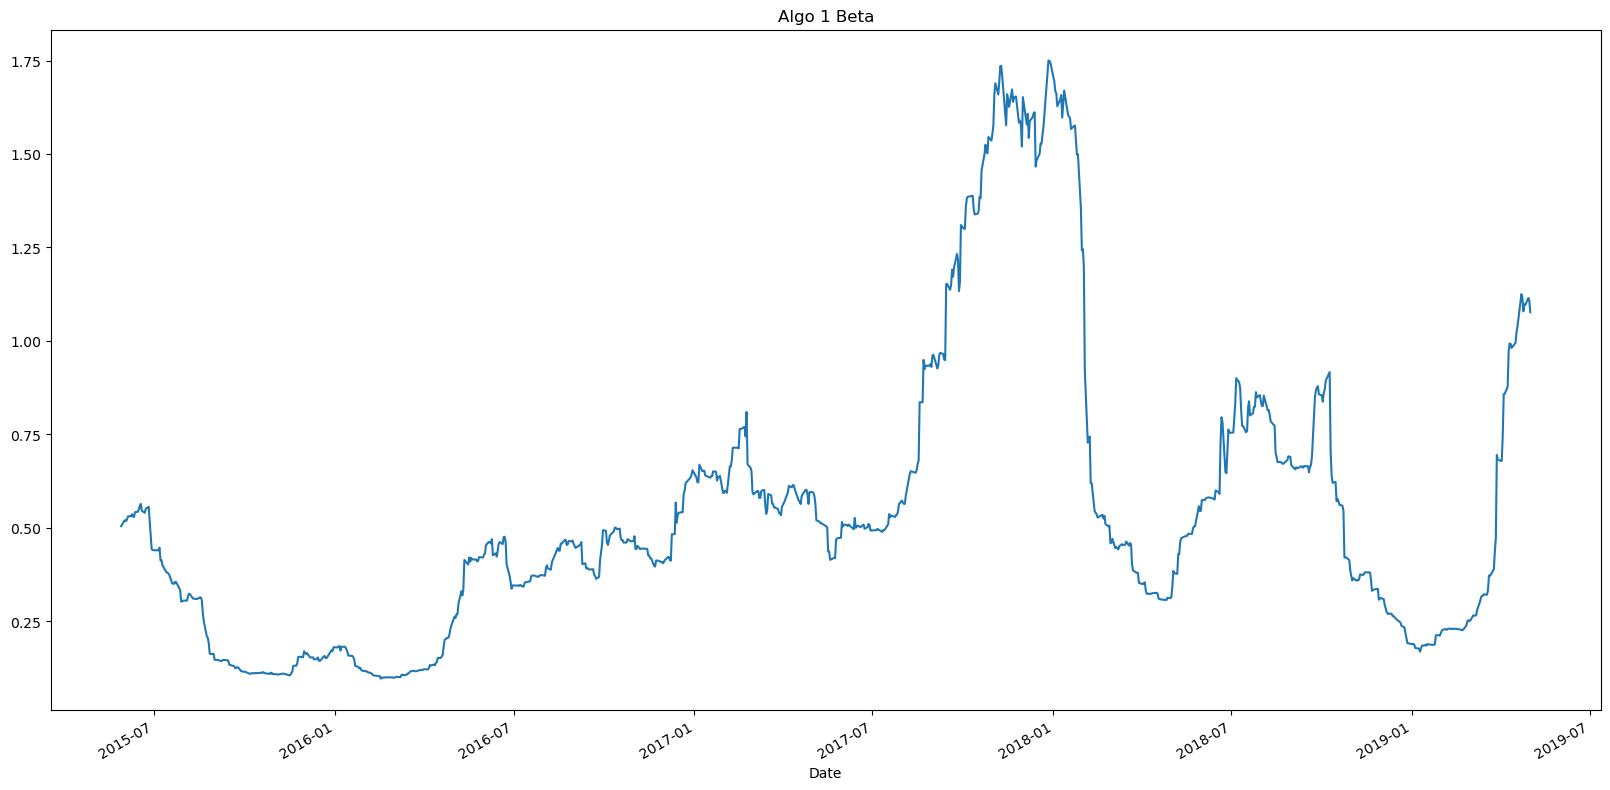

In [14]:
# Calculate covariance of a single portfolio
Algo1_cov = combined_returns["Algo 1"].cov(combined_returns["SP TSX 60"])

# Calculate variance of S&P TSX
rolling_variance = combined_returns["SP TSX 60"].rolling(window=60).var()

# Computing beta
Algo1_beta = Algo1_cov / rolling_variance

# Plot beta trend

Algo1_beta = Algo1_beta.dropna()
Algo1_beta.plot(figsize=(20, 10), title="Algo 1 Beta")

In [15]:
# Use `ewm` to calculate the rolling window
EWM_21 = annualized_std.ewm(halflife=21)
#EWM_21.plot(figsize=(20, 10), title='Rolling Standard Deviation')

In [16]:
# Annualized Sharpe Ratios
Risk_Free_Rate=0.0347
#sharpe_ratio = ((combined_returns.mean() - Risk_Free_Rate)) / (combined_returns.std() * np.sqrt(252))
#sharpe_ratio

sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.290688
PAULSON & CO.INC.             -0.555201
TIGER GLOBAL MANAGEMENT LLC   -0.146460
BERKSHIRE HATHAWAY INC         0.473532
Algo 1                         1.521602
Algo 2                         0.393500
SP TSX 60                      0.286526
dtype: float64

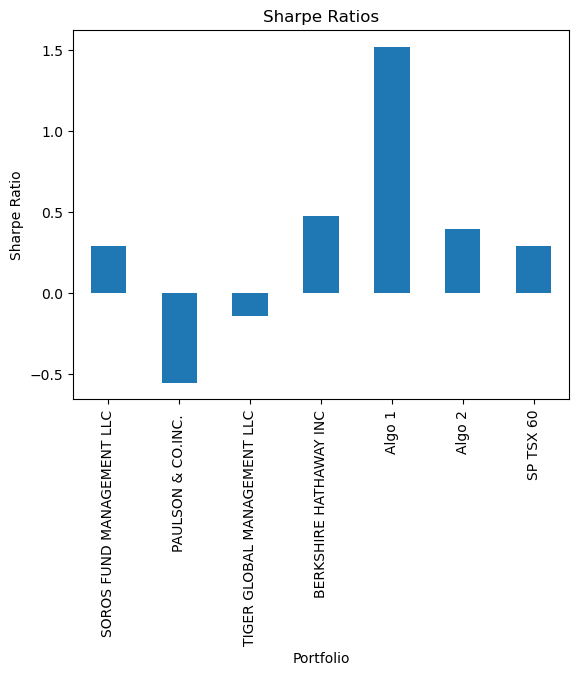

In [17]:
# Visualize the sharpe ratios as a bar plot
#plt.bar(sharpe_ratio, figsize = (10,5))
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()

In [18]:
# Reading data from 1st stock
otex_data = Path('../Starter_Code/Resources/otex_historical.csv')
otex_df = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
#otex_df.head()

# Reading data from 2nd stock
shop_data = Path('../Starter_Code/Resources/shop_historical.csv')
shop_df = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
#shop_df.head()

# Reading data from 3rd stock
# Reading data from 2nd stock
Loblaws_data = Path('../Starter_Code/Resources/l_historical.csv')
Lob_df = pd.read_csv(Loblaws_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
#Lob_df.head()

# Combine all stocks in a single DataFrame
portfolio_returns = pd.concat([otex_df, shop_df, Lob_df], axis='rows', join='inner')
portfolio_returns

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [19]:
# Reset Date index
portfolio_returns = portfolio_returns.reset_index()
portfolio_returns.head()

,Date,Symbol,Close
0,2018-01-02,OTEX,43.58
1,2018-01-03,OTEX,43.07
2,2018-01-04,OTEX,42.91
3,2018-01-05,OTEX,42.57
4,2018-01-08,OTEX,42.16


In [20]:
# Reorganize portfolio data by having a column per symbol
# Create a new DataFrame where the columns are the closing prices for each ticker
portfolio_returns = portfolio_returns.pivot_table(values="Close", index="Date", columns="Symbol")
portfolio_returns

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [21]:
# Calculate daily returns
portfolio_daily_returns = portfolio_returns.pct_change()
#portfolio_daily_returns.head()
# Drop NAs
portfolio_daily_returns= portfolio_daily_returns.dropna()
# Display sample data

portfolio_daily_returns

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [22]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Weighted_port_returns = portfolio_daily_returns.dot(weights) 
Weighted_port_returns.columns = ['Date', 'My_Port']

# Display sample data

Weighted_port_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [23]:
combined_returns["Custom"] = Weighted_port_returns
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [24]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna().copy()
#combined_returns

In [25]:
# Calculate the annualized `std`
combined_returns.std()
annualized_std = combined_returns *np.sqrt(252)
annualized_std.head(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60,Custom
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707


<AxesSubplot:xlabel='Date'>

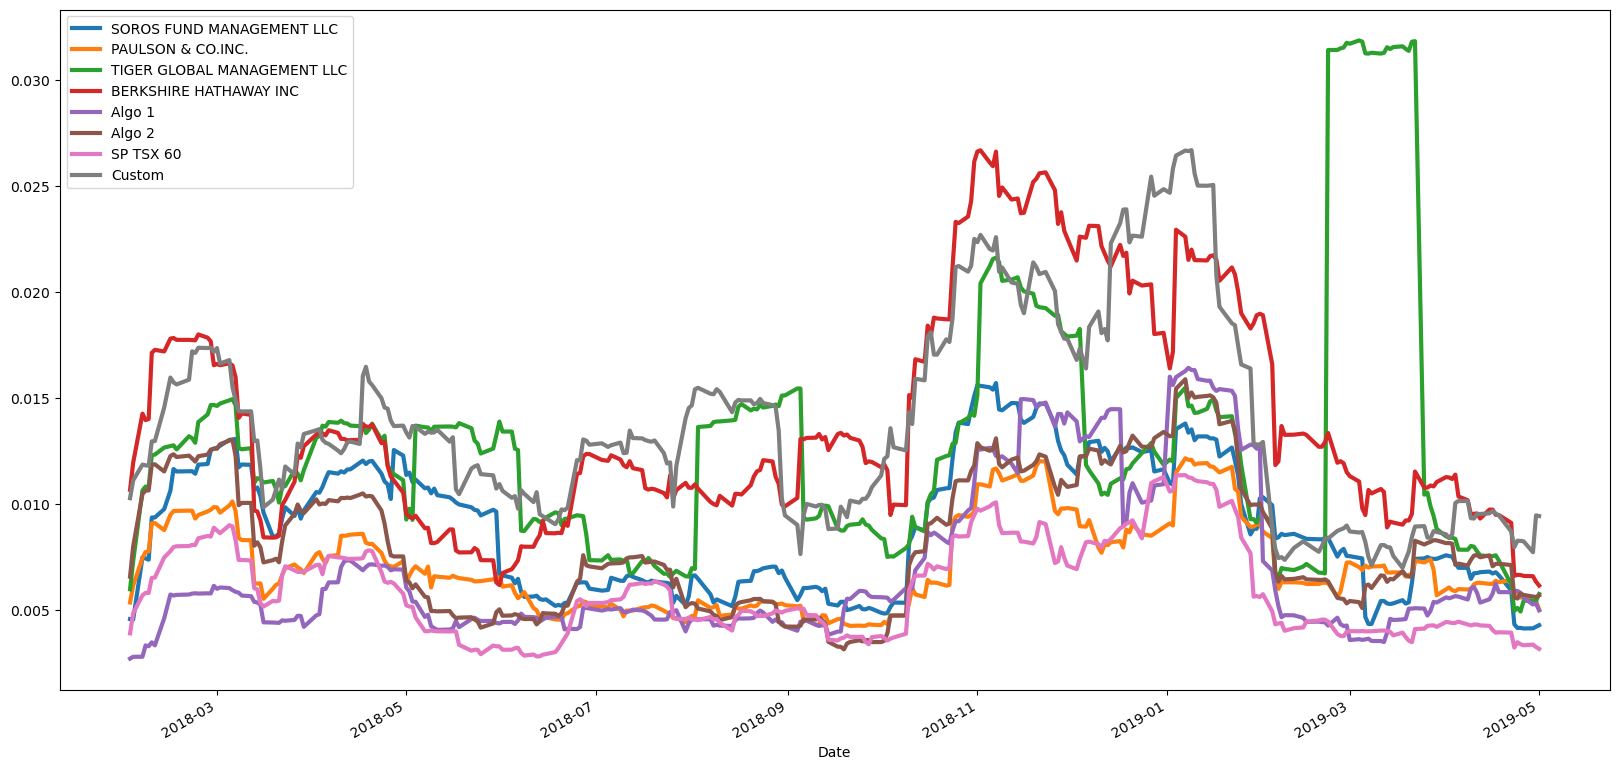

In [26]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
MA_21 = combined_returns.rolling(window=21).std()
MA_21.plot(figsize=(20,10),linewidth=3)

<AxesSubplot:>

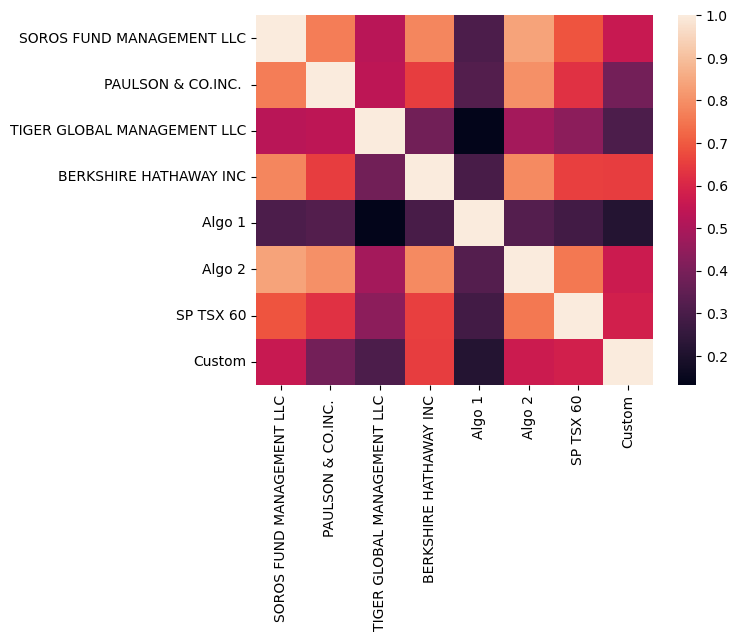

In [27]:
# Calculate and plot the correlation

correlation = combined_returns.corr()
#correlation
# Display de correlation matrix
sns.heatmap(correlation)

<AxesSubplot:title={'center':'Algo 1 Beta'}, xlabel='Date'>

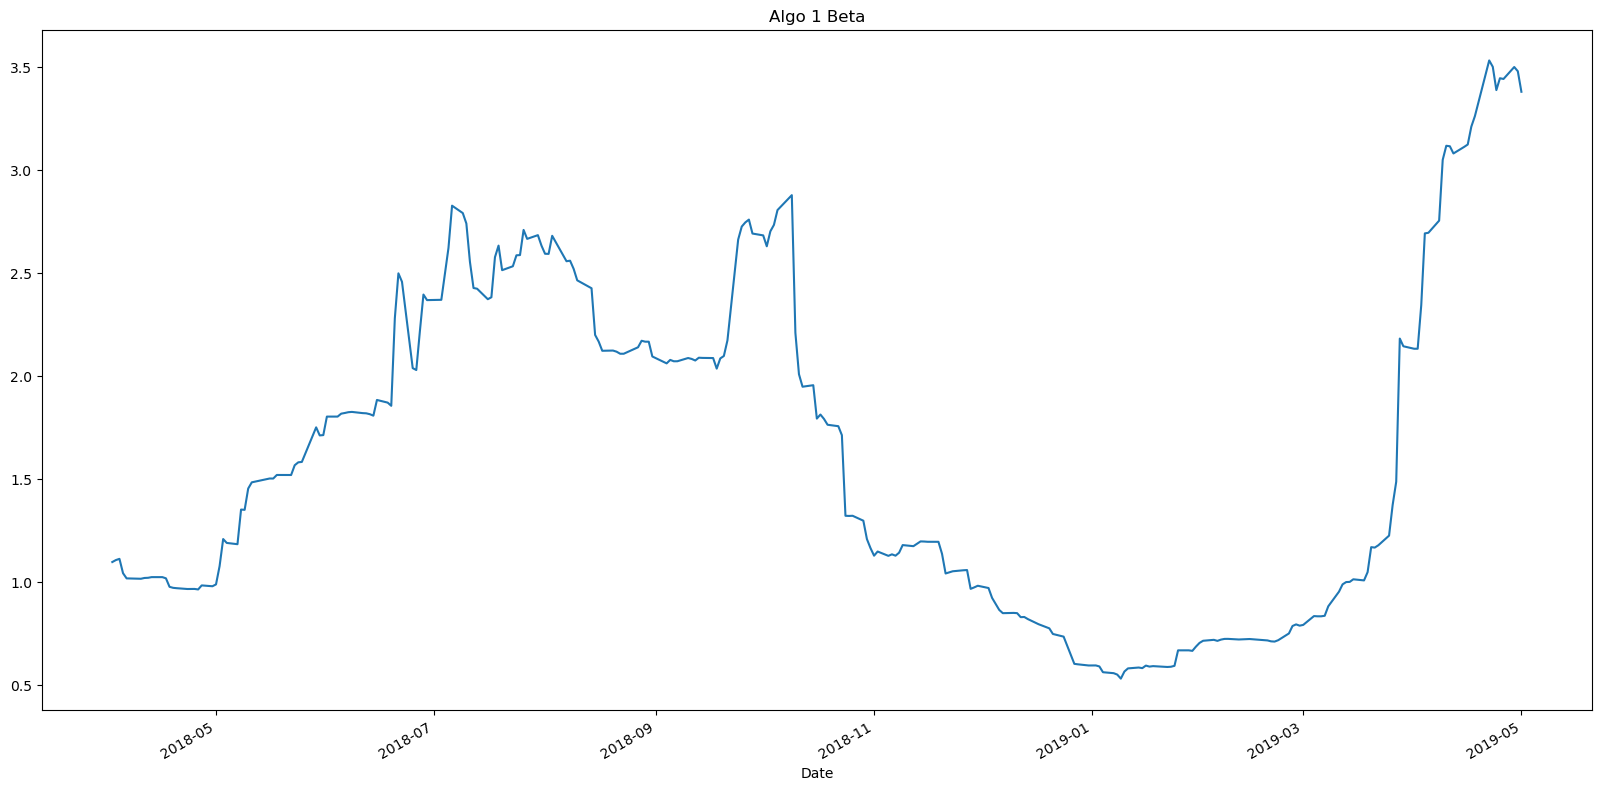

In [28]:
# Calculate and plot Beta
Weighted_port_returns_cov = Weighted_port_returns.cov(combined_returns["SP TSX 60"])

rolling_variance_tsx = combined_returns["SP TSX 60"].rolling(window=60).var()
#rolling_var_my_port = Weighted_port_returns.rolling(window=60).var()

my_port_beta = Weighted_port_returns_cov / rolling_variance_tsx

my_port_beta.plot(figsize=(20, 10), title="Algo 1 Beta")

In [29]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.089011
PAULSON & CO.INC.             -0.399948
TIGER GLOBAL MANAGEMENT LLC   -1.404579
BERKSHIRE HATHAWAY INC         0.197718
Algo 1                         2.006268
Algo 2                        -0.042159
SP TSX 60                      0.017901
Custom                         1.627444
dtype: float64

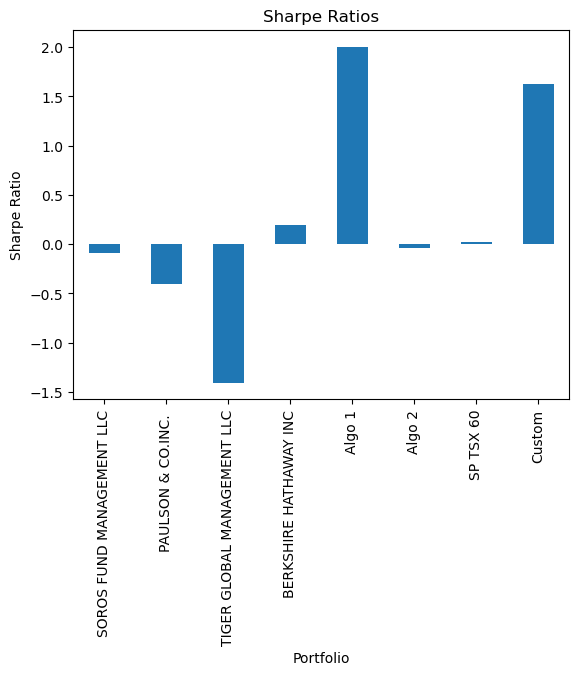

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()

In [31]:
#The portfolio does quite well.  It exceeds all others except algo 1 in returns and in risk reward ratio.